In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('WRY1OG7N_train.csv')
test_data = pd.read_csv('WRY1OG7N_test.csv')

In [3]:
train_data.head()

,x1,x2,x3,x4,x5,f
0,233,112,55,9,25,108584
1,43,38,43,4,165,3689
2,139,106,11,7,153,38664
3,82,129,71,0,48,13470
4,289,6,51,2,0,167033


In [4]:
test_data.head()

,x1,x2,x3,x4,x5
0,258,72,71,4,180
1,151,85,58,5,151
2,229,72,1,7,65
3,222,45,55,9,69
4,48,111,44,2,109


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
x1    100 non-null int64
x2    100 non-null int64
x3    100 non-null int64
x4    100 non-null int64
x5    100 non-null int64
f     100 non-null int64
dtypes: int64(6)
memory usage: 4.8 KB


In [6]:
train_data.describe()

,x1,x2,x3,x4,x5,f
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,150.26000,67.740000,48.900000,4.430000,101.640000,62481.810000
std,93.53837,43.960409,29.671093,2.920686,63.100452,57742.537292
min,0.00000,1.000000,0.000000,0.000000,0.000000,4.000000
25%,65.25000,32.750000,24.000000,2.000000,44.500000,8534.000000
50%,142.50000,62.000000,50.000000,4.500000,100.000000,40613.500000
75%,239.00000,106.000000,71.250000,7.000000,162.000000,114233.250000
max,297.00000,146.000000,99.000000,9.000000,199.000000,176423.000000


In [7]:
test_data.describe()

,x1,x2,x3,x4,x5
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,170.300000,67.800000,49.150000,4.200000,101.600000
std,93.466628,35.144214,28.560693,2.764436,55.969353
min,0.000000,4.000000,1.000000,1.000000,22.000000
25%,125.500000,53.250000,32.000000,2.000000,61.500000
50%,158.500000,72.000000,49.500000,4.000000,95.000000
75%,250.500000,86.000000,71.500000,6.250000,152.750000
max,295.000000,128.000000,93.000000,9.000000,197.000000


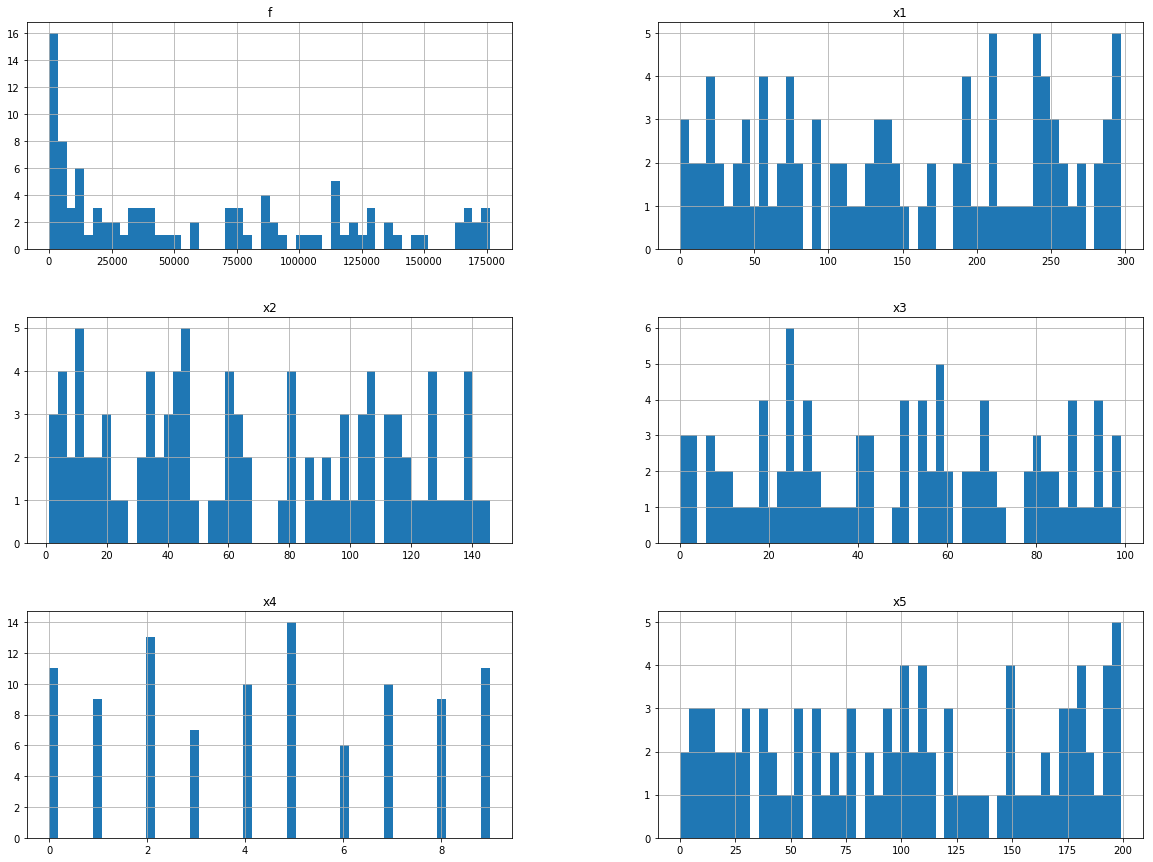

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins = 50, figsize=(20,15))
plt.show()

In [18]:
corr_matrix = train_data.corr()

In [19]:
corr_matrix['f'].sort_values(ascending=False)

f     1.000000
x1    0.970397
x4    0.103626
x3    0.007050
x5   -0.047700
x2   -0.078247
Name: f, dtype: float64

In [23]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12197b160>,
      dtype=object)

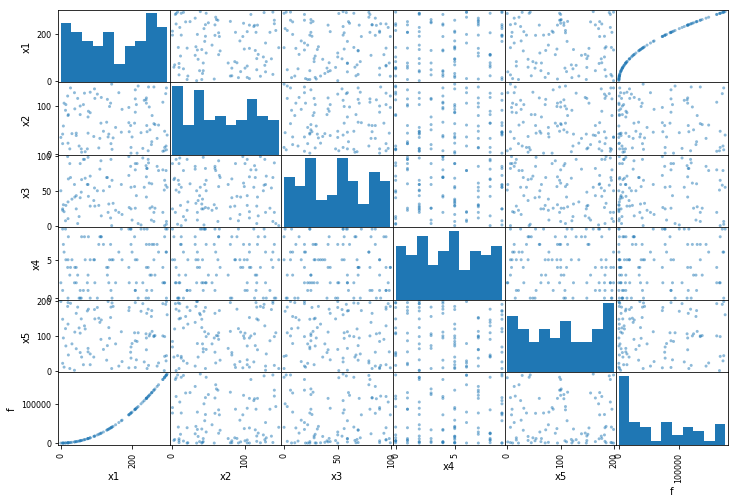

In [28]:
%matplotlib inline
scatter_matrix(train_data, figsize=(12,8))

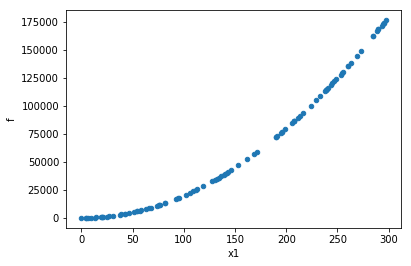

In [30]:
train_data.plot(kind = 'scatter', x='x1', y = 'f')

In [43]:
train = pd.DataFrame(train_data['x1'])
train_labels = train_data['f'].copy()

In [57]:
train = pd.DataFrame(train_data['x1'])
train_labels = pd.DataFrame(train_data['f'])

In [44]:
train.head()

0    233
1     43
2    139
3     82
4    289
Name: x1, dtype: int64

In [45]:
train_labels.head()

0    108584
1      3689
2     38664
3     13470
4    167033
Name: f, dtype: int64

In [59]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(train, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
f    100 non-null int64
dtypes: int64(1)
memory usage: 880.0 bytes


In [61]:
predictions = lm.predict(test_data2)

In [60]:
test_data2 = pd.DataFrame(test_data['x1'])

In [62]:
predictions

array([[127022.34719197],
       [ 62925.09937741],
       [109650.19591513],
       [105456.91802072],
       [  1224.01035965],
       [ 61727.01997901],
       [113244.43411034],
       [122230.02959836],
       [147988.73666403],
       [149186.81606243],
       [-14351.02181959],
       [ 57533.7420846 ],
       [-11355.82332358],
       [123428.10899676],
       [ 41359.67020615],
       [ 49746.22599498],
       [-27529.89520202],
       [137206.0220784 ],
       [ 61127.9802798 ],
       [ 71910.69486543]])

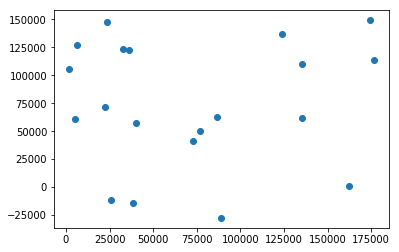

In [64]:
plt.scatter(train_labels.sample(n=20),predictions)

In [65]:
train_labels.sample(n=20)

,f
51,4441
21,144735
84,76837
18,5179
46,908
26,79191
38,115216
31,16938
66,120061
58,23743


In [66]:
#2 all attributes are taken

In [67]:
train2 = train_data.drop('f', axis=1)
train_labels2 = train_data['f'].copy()

In [68]:
lm2 = LinearRegression()
lm2.fit(train2, train_labels2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
predictions2 = lm2.predict(test_data)

In [105]:
list(predictions2)

[125251.16700433129,
 61650.660515739466,
 112307.28385232076,
 105979.274021294,
 139.8471608812033,
 60945.88544064906,
 112277.34892010274,
 123426.79305773233,
 145952.0994347689,
 147510.82245082175,
 -18372.03613925194,
 61433.00709620316,
 -10804.98833545801,
 124002.12422306689,
 42587.08617046838,
 51481.12755708273,
 -29241.42022158972,
 137232.3680927595,
 61096.20192458216,
 74387.82101810827]

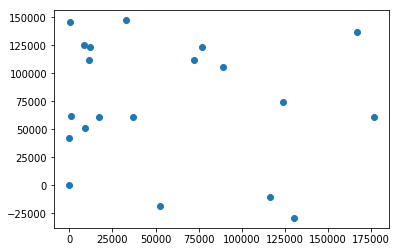

In [75]:
plt.scatter(train_labels2.sample(n=20),predictions2)

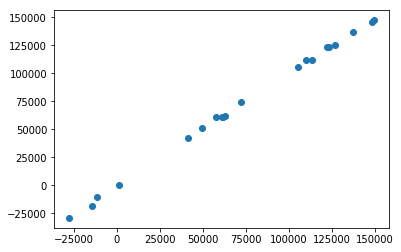

In [76]:
plt.scatter(predictions,predictions2)

In [106]:
np.corrcoef(predictions, predictions2)

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [ ]:
#divide train into train and test
#and use linear regression and decisiontree